# A notebook to explore the newly migrated DVC data.

We've added weather data (temp and cloud cover) to the chunked DVC data warehouse. Doing basic exploring here 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from prefect import flow 
from IPython.core.debugger import set_trace

In [18]:
# Auto reload core modules so I don't need to restart kernel when I change
# the code in those modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
from core.consts import EIA_TEST_SET_HOURS, EIA_BUFFER_HOURS
from core.model import get_data_for_model_input
from core.data import get_chunk_index, get_range_from_dvc_as_df, clean_data, fetch_data, get_current_dvc_commit_hash
from flows.train_model_flow import train_model

In [89]:
start = pd.Timestamp('2015-07-01 05:00:00+00:00')
end = pd.Timestamp('2024-11-12 05:00:00+00:00')
df = fetch_data(start, end)


fetch_data initiated:
  req range: start:2015-07-01 05:00:00+00:00. end:2024-11-12 05:00:00+00:00.
  hit range: (Timestamp('2015-07-01 05:00:00+0000', tz='UTC'), Timestamp('2024-11-12 05:00:00+0000', tz='UTC')).
  miss range: None.

Requesting data from DVC. start:2015-07-01 05:00:00+00:00. end:2024-11-12 05:00:00+00:00


/app/core/data.py:147: UserWarning: Converting to Period representation will drop timezone information.
  q_start_ts = pd.Timestamp(start_ts).to_period('Q').start_time.tz_localize('UTC')
/app/core/data.py:148: UserWarning: Converting to Period representation will drop timezone information.
  q_end_ts = pd.Timestamp(end_ts).to_period('Q').end_time.tz_localize('UTC')


Fetched data from DVC. start:2015-07-01 05:00:00+00:00. end:2024-11-12 05:00:00+00:00

fetch_data complete:
  Requested range: start:2015-07-01 05:00:00+00:00. end:2024-11-12 05:00:00+00:00.
  Fetched from DVC: start:2015-07-01 05:00:00+00:00. end:2024-11-12 05:00:00+00:00.
  Fetched from API: None.
  Fetched range: start:2015-07-01 05:00:00+00:00. end:2024-11-12 05:00:00+00:00.
fetch_data result dataframe info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82129 entries, 2015-07-01 05:00:00+00:00 to 2024-11-12 05:00:00+00:00
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   D               81958 non-null  float64
 1   temperature_2m  82129 non-null  float64
 2   cloud_cover     82129 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 4.5 MB

fetch_data result dataframe summary:
                                 D  temperature_2m  cloud_cover
utc_ts                                              

<Axes: >

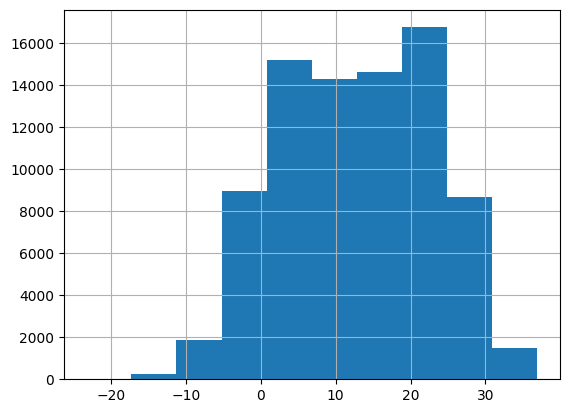

In [93]:
df.temperature_2m.hist()

In [95]:
df.temperature_2m.isna().sum()

0

In [88]:
train_model(start_ts=None, end_ts=None, mlflow_tracking=False)

19:18:44.414 | INFO    | prefect.engine - Created flow run 'stirring-magpie' for flow 'train-model'

19:18:44.420 | INFO    | prefect.engine - View at https://app.prefect.cloud/account/914106c7-cc3b-4c5c-99f4-915f39352746/workspace/d3b27b3d-41ca-47a0-9b5b-2eebd92a4b25/runs/flow-run/a229c42b-e799-4672-9470-aeca1773fdb3

Training set time span: 2018-07-01 05:00:00+00:00 to 2024-10-18 19:00:00+00:00


19:18:44.738 | INFO    | Task run 'get_training_data-bd9' - Created task run 'get_training_data-bd9' for task 'get_training_data'


fetch_data initiated:
  req range: start:2018-07-01 05:00:00+00:00. end:2024-10-18 19:00:00+00:00.
  hit range: (Timestamp('2018-07-01 05:00:00+0000', tz='UTC'), Timestamp('2024-10-18 19:00:00+0000', tz='UTC')).
  miss range: None.

Requesting data from DVC. start:2018-07-01 05:00:00+00:00. end:2024-10-18 19:00:00+00:00


/app/core/data.py:147: UserWarning: Converting to Period representation will drop timezone information.
  q_start_ts = pd.Timestamp(start_ts).to_period('Q').start_time.tz_localize('UTC')
/app/core/data.py:148: UserWarning: Converting to Period representation will drop timezone information.
  q_end_ts = pd.Timestamp(end_ts).to_period('Q').end_time.tz_localize('UTC')


Fetched data from DVC. start:2018-07-01 05:00:00+00:00. end:2024-10-18 19:00:00+00:00

fetch_data complete:
  Requested range: start:2018-07-01 05:00:00+00:00. end:2024-10-18 19:00:00+00:00.
  Fetched from DVC: start:2018-07-01 05:00:00+00:00. end:2024-10-18 19:00:00+00:00.
  Fetched from API: None.
  Fetched range: start:2018-07-01 05:00:00+00:00. end:2024-10-18 19:00:00+00:00.
fetch_data result dataframe info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55239 entries, 2018-07-01 05:00:00+00:00 to 2024-10-18 19:00:00+00:00
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   D               55120 non-null  float64
 1   temperature_2m  55239 non-null  float64
 2   cloud_cover     55239 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 3.7 MB

fetch_data result dataframe summary:
                                  D  temperature_2m  cloud_cover
utc_ts                                             

/app/core/data.py:147: UserWarning: Converting to Period representation will drop timezone information.
  q_start_ts = pd.Timestamp(start_ts).to_period('Q').start_time.tz_localize('UTC')
/app/core/data.py:148: UserWarning: Converting to Period representation will drop timezone information.
  q_end_ts = pd.Timestamp(end_ts).to_period('Q').end_time.tz_localize('UTC')


Fetched data from DVC. start:2015-07-05 05:00:00+00:00. end:2018-07-01 05:00:00+00:00
post lag backfill dataframe info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81447 entries, 2015-07-05 05:00:00+00:00 to 2024-10-18 19:00:00+00:00
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   D               81276 non-null  float64
 1   temperature_2m  81447 non-null  float64
 2   cloud_cover     81447 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 MB

post lag backfill dataframe summary:
                                 D  temperature_2m  cloud_cover
utc_ts                                                         
2015-07-05 05:00:00+00:00  73295.0            17.2           16
2015-07-05 06:00:00+00:00  69134.0            17.1           13
2015-07-05 07:00:00+00:00  66665.0            15.4           25
2015-07-05 08:00:00+00:00  66391.0            15.2           74
2015-07-05 09:00:00+00:00  6

Calculating Metrics:   0%|          | 0/35 [00:00<?, ?it/s]

GX Validation failure. suite:xgb_input
{'success': False, 'statistics': {'evaluated_expectations': 6, 'successful_expectations': 5, 'unsuccessful_expectations': 1, 'success_percent': 83.33333333333334}, 'expectations': [{'expectation_type': 'expect_table_columns_to_match_set', 'success': False, 'kwargs': {'batch_id': 'pandas_datasource-xgb_input-df-20241118_191854', 'column_set': ['utc_ts', 'hour', 'month', 'year', 'quarter', 'dayofweek', 'dayofmonth', 'dayofyear', 'lag_1y', 'lag_2y', 'lag_3y', 'is_holiday', 'D'], 'exact_match': True}, 'result': {'observed_value': ['D', 'cloud_cover', 'dayofmonth', 'dayofweek', 'dayofyear', 'hour', 'is_holiday', 'lag_1y', 'lag_2y', 'lag_3y', 'month', 'quarter', 'temperature_2m', 'utc_ts', 'year'], 'details': {'mismatched': {'unexpected': ['cloud_cover', 'temperature_2m']}}}}, {'expectation_type': 'expect_column_values_to_not_be_null', 'success': True, 'kwargs': {'batch_id': 'pandas_datasource-xgb_input-df-20241118_191854', 'column': 'D'}, 'result': {'e

19:18:54.822 | INFO    | Task run 'get_training_data-bd9' - Finished in state Completed()

19:18:54.825 | ERROR   | Flow run 'stirring-magpie' - Encountered exception during execution: AssertionError()
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/prefect/flow_engine.py", line 652, in run_context
    yield self
  File "/usr/local/lib/python3.10/site-packages/prefect/flow_engine.py", line 696, in run_flow_sync
    engine.call_flow_fn()
  File "/usr/local/lib/python3.10/site-packages/prefect/flow_engine.py", line 675, in call_flow_fn
    result = call_with_parameters(self.flow.fn, self.parameters)
  File "/usr/local/lib/python3.10/site-packages/prefect/utilities/callables.py", line 206, in call_with_parameters
    return fn(*args, **kwargs)
  File "/app/flows/train_model_flow.py", line 116, in train_model
    assert False
AssertionError

19:18:54.947 | ERROR   | Flow run 'stirring-magpie' - Finished in state Failed('Flow run encountered an exception: AssertionError: ')

AssertionError: 